# An example machine learning notebook

### Notebook by Esmee Kraan
#### Sommige code is geschreven met behulp van ChatGPT, boven het codeblok zal dit vermeld staan

---

## Table of contents

1. [Introduction](#Introduction)

2. [Business Understanding](#Business-Understanding)

3. [Required libraries](#Required-libraries)

4. [Data Understanding](#Data-Understanding)

5. [Data Prepartion](#Data-Preparation)

6. [Modeling](#Modeling)

7. [Evaluation](#Evaluation)

8. [Deployment](#Deployment)

---

# Introduction

[[ go back to the top ]](#Table-of-contents)

In dit notebook richt ik mij op het bouwen van een automatisch vertaalmodel tussen Nederlands en Fries met behulp van deep learning-technieken, specifiek Transformers. Dit project heeft als doel om de vertaling tussen deze twee talen te verbeteren door een op maat getraind model te ontwikkelen. De motivatie voor deze opdracht komt voort uit praktische uitdagingen, zoals officiële communicatie en juridische zaken in Friesland, waar Fries vaak wordt gebruikt, maar vertaald moet worden naar het Nederlands.

---

# Business Understanding

[[ go back to the top ]](#Table-of-contents)

Het hoofddoel van dit project is het bouwen van een vertaalmodel dat de nauwkeurigheid en betrouwbaarheid van vertalingen tussen Nederlands en Fries verbetert. Het begrijpen van de behoefte van de klant draait om het oplossen van een praktisch probleem: ervoor zorgen dat Friese sprekers en schrijvers zonder taalbarrières kunnen communiceren met Nederlandse instellingen. Dit wordt vooral belangrijk in formele omgevingen, zoals rechtbanken en academische instellingen, waar nauwkeurige vertalingen cruciaal zijn.

### Belangrijke vragen:
1. **Weet ik wat ik aan het oplossen ben?**
   - Ja, ik werk aan het creëren van een nauwkeurig vertaalmodel tussen Nederlands en Fries, dat inspeelt op de behoeften van de Friese gemeenschap.

2. **Begrijp ik de context van de vraag van de klant en de toepassing?**
   - Ja, het model is bedoeld voor Friese sprekers in formele contexten zoals academie, rechtspraak en openbare communicatie. De behoefte aan vertaaloplossingen komt voort uit de wens om het gebruik van het Fries te behouden en te bevorderen, terwijl belangrijke communicatie met Nederlandse instellingen zonder problemen kan verlopen.

3. **Is het haalbaar met de huidige data?**
   - De dataset van de Fryske Akademy lijkt voldoende om een basisvertaalmodel te trainen. De uitdaging ligt echter in het verbeteren van de datavoorbereiding, het verwerken van meerdere vertaalopties en het optimaliseren van het netwerk voor betere prestaties, vooral gezien de beperkte beschikbaarheid van Friese taalbronnen.

---

# Required Libraries

[[ go back to the top ]](#Table-of-contents)

Als je Python nog niet op je computer hebt staan, kun je de [Anaconda Python-distributie](http://continuum.io/downloads) gebruiken om de meeste benodigde Python-packages te installeren. Anaconda biedt een eenvoudige installer die je met een dubbelklik kunt gebruiken.

Dit notebook maakt gebruik van verschillende Python-packages die standaard worden meegeleverd met de Anaconda Python-distributie. De belangrijkste bibliotheken die ik zal gebruiken zijn:

* **NumPy**: Biedt een snelle numerieke array-structuur en hulpfuncties.
* **pandas**: Biedt een DataFrame-structuur om gegevens in het geheugen op te slaan en er gemakkelijk en efficiënt mee te werken.
* **scikit-learn**: Het essentiële machine learning-pakket in Python.
* **matplotlib**: Een basis plotbibliotheek in Python; de meeste andere Python-plotbibliotheken zijn hierop gebouwd.
* **Seaborn**: Een geavanceerde bibliotheek voor statistische visualisaties.
* **tqdm**: Een bibliotheek voor het maken van voortgangsbalken in loops.
* **TensorFlow**: Een populaire deep learning-bibliotheek voor het bouwen en trainen van neurale netwerken.

Om ervoor te zorgen dat je alle benodigde packages hebt, kun je ze installeren met `conda` of `pip`:

```bash
conda install numpy pandas scikit-learn matplotlib seaborn tqdm tensorflow
pip install numpy pandas scikit-learn matplotlib seaborn tqdm tensorflow
```

In [601]:
# Voor het inlezen, manipuleren en analyseren van gestructureerde gegevens zoals DataFrames.
import pandas as pd

# Voor numerieke berekeningen en het werken met arrays.
import numpy as np

# Voor het bouwen, trainen en evalueren van machine learning modellen, inclusief neuraal netwerkarchitecturen.
import tensorflow as tf

# Voor het definiëren van modellen en het uitvoeren van training en evaluatie. Het biedt een gebruiksvriendelijke interface.
from tensorflow import keras
from tensorflow.keras import layers

# Voor data preprocessing, zoals het splitsen van datasets en evaluatiemetrieken.
from sklearn.model_selection import train_test_split

# Voor het lezen van Excel-bestanden, wat handig kan zijn voor het inlezen van datasets.
import openpyxl

# Voor het visualiseren van resultaten
import matplotlib.pyplot as plt
import seaborn as sns

# Voor het tonen van voortgangsbalken in loops
from tqdm import tqdm

import string
import re

---

# Data Understanding

[[ go back to the top ]](#Table-of-contents)

---

In [602]:
df = pd.read_csv('dataset/dataset.csv')

In [603]:
text_file = "texts.txt"

with open(text_file, encoding='utf8') as f:
    lines = f.readlines() 

print(len(lines))

195545


In [604]:
df.head()

,nederlands,fries
0,we hebben de burgemeester het advies gegeven om het cafe tijdelijk te sluiten aldus de stadsambt...,wy hawwe de boargemaster it advys jun om it kafee tydlik te sluten sei de stedsamtner
1,we hebben de burgemeester het advies gegeven om het cafe tijdelijk te sluiten aldus de stadsambt...,wy hawwe de boargemaster it advys jun om it kafee tydlik te sluten seit de stedsamtner
2,een plotselinge dood,in hastige dea
3,een plotselinge dood,in unferwachte dea
4,zijn plotseling overlijden,syn hastich ferstjerren


In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   nederlands  173912 non-null  object
 1   fries       173912 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


In [606]:
df.isna().sum()

nederlands    0
fries         0
dtype: int64

In [607]:
df = df.dropna().reset_index(drop=True)

In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   nederlands  173912 non-null  object
 1   fries       173912 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


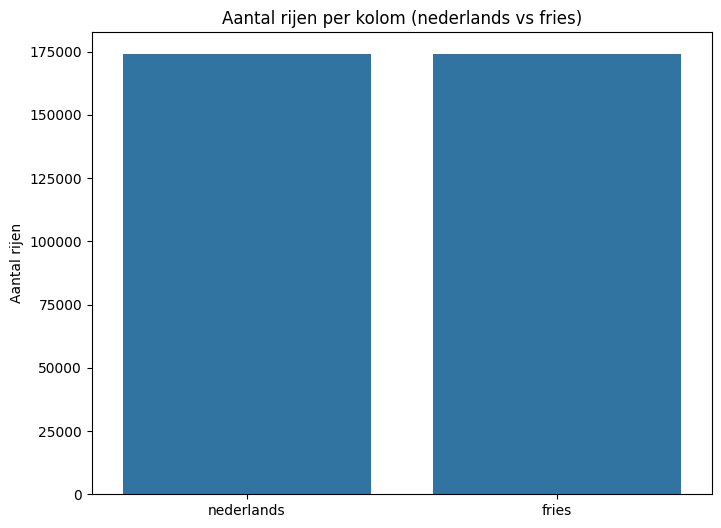

In [609]:
# Zorg dat de kolommen van het juiste datatype zijn
df['nederlands'] = df['nederlands'].astype(str)
df['fries'] = df['fries'].astype(str)

# Plot aantal rijen voor beide kolommen
nederlands_count = df['nederlands'].notna().sum()
fries_count = df['fries'].notna().sum()

# Bar plot voor het aantal rijen
plt.figure(figsize=(8, 6))
sns.barplot(x=['nederlands', 'fries'], y=[nederlands_count, fries_count])
plt.title('Aantal rijen per kolom (nederlands vs fries)')
plt.ylabel('Aantal rijen')
plt.show()

De verdeling van de woorden is 50/50 dus daar ga ik verder niks mee doen. Ik was wel benieuwd naar wat het maximaal aantal karakters/ letters en woorden zijn voor beide talen. In de plots hieronder plot ik eerst de max en min `karakters` daarna de max en min `letters`

Max aantal karakers/ letters NL:  390
Min aantal karakters/ letters NL:  3
Max aantal karakters/ letters FY:  354
Min aantal karakters/ letter FY:  1


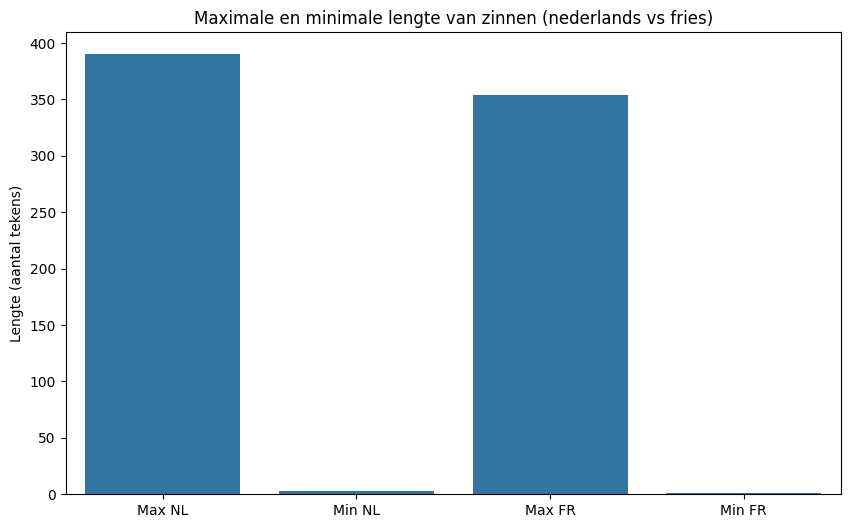

In [610]:
# Bereken de lengte van zinnen (aantal tekens) voor beide kolommen
df['nederlands_len'] = df['nederlands'].apply(len)
df['fries_len'] = df['fries'].apply(len)

# Plot de maximale en minimale lengte van de zinnen
max_nl_len = df['nederlands_len'].max()
min_nl_len = df['nederlands_len'].min()
max_fr_len = df['fries_len'].max()
min_fr_len = df['fries_len'].min()

print("Max aantal karakers/ letters NL: ", max_nl_len)
print("Min aantal karakters/ letters NL: ", min_nl_len)
print("Max aantal karakters/ letters FY: ", max_fr_len)
print("Min aantal karakters/ letter FY: ", min_fr_len)

# Bar plot voor maximale en minimale zinslengte
plt.figure(figsize=(10, 6))
sns.barplot(x=['Max NL', 'Min NL', 'Max FR', 'Min FR'], 
            y=[max_nl_len, min_nl_len, max_fr_len, min_fr_len])
plt.title('Maximale en minimale lengte van zinnen (nederlands vs fries)')
plt.ylabel('Lengte (aantal tekens)')
plt.show()

Wat me hier gelijk opvalt is het minimaal aantak karakters bij fries wat `1` is. Daarom heb ik gekeken wat dit precies inhoudt.

In [611]:
# Print de rijen met de minimale lengte van de zinnen
min_nl_row = df[df['nederlands_len'] == min_nl_len]
min_fr_row = df[df['fries_len'] == min_fr_len]

print("Rij met de minimale lengte van de zin in het Nederlands:")
print(min_nl_row)

print("\nRij met de minimale lengte van de zin in het Fries:")
print(min_fr_row)

Rij met de minimale lengte van de zin in het Nederlands:
       nederlands    fries  nederlands_len  fries_len
14756         los      los               3          3
23982         zit      sit               3          3
23983         zit    sitte               3          5
44224         wie       wa               3          2
167656        een  healwei               3          7
167657        een    ienen               3          5
167658        een  tsienen               3          7
167659        een   tolven               3          6

Rij met de minimale lengte van de zin in het Fries:
             nederlands fries  nederlands_len  fries_len
170636  in de wandeling     e              15          1


Bij deze vertaling gaat iets fout. `in de wandeling` wordt vertaald naar `e` dat kan niet kloppen. De minimale lengte van de zinnen in het Nederlands lijken voor een gedeelte wel te kloppen. Maar ook niet helemaal.

`een` wordt vertaald naar de volgende woorden:

1. **healwei** - gezondheid
2. **inene** - toevallig of wellicht (afhankelijk van de context)
3. **tsienen** - tien
4. **tolven** - twaalf

iets gaat hier dus niet goed. Ik wil kijken hoe deze dingen zitten bij de minimale woorden, wat ik hieronder bekijk.

In [612]:
# Toon de rijen waar min_fr_row == 2
min_fr_row = df[df['fries_len'] == 2]
min_fr_row

,nederlands,fries,nederlands_len,fries_len
1941,iets van,in,8,2
28392,als volgt,sa,9,2
35796,op deze wijze,sa,13,2
35798,op die wijze,sa,12,2
35904,op zodanige wijze,sa,17,2
39036,te eniger tijd,ea,14,2
42190,einde,ut,5,2
42477,ten einde,om,9,2
44224,wie,wa,3,2
45367,door en door,yn,12,2


Hier gaat ook wat fout, vaak missen er hele woorden bij de friezen vertaling. Neem bijvoorbeeld `per kilo`, `per ons` en `per pond`. In het fries zijn dit de volgende vertalingen:

- per kilo = de kilo
- per ons = it ús
- per pond = de pûn

hetzelfde geldt bij `een wandeling maken` en `in de wandeling` dit hoort het volgende te zijn:

- een wandeling maken = in kuier metsjen
- in de wandeling = yn de kuier

Om deze reden heb ik deze rijen wel verwijderd uit de dataframe.

In [613]:
# Specifieke waarden definiëren die je wilt verwijderen
values_to_remove = ["per kilo", "per pond", "per ons", "in de wandeling", "een wandeling maken"]

# Filter de DataFrame om rijen te verwijderen met specifieke waarden in de 'nederlands' kolom
df = df[~df['nederlands'].isin(values_to_remove)]

In [614]:
# Toon de rijen waar min_fr_row == 2
min_fr_row = df[df['fries_len'] == 2]
min_fr_row

,nederlands,fries,nederlands_len,fries_len
1941,iets van,in,8,2
28392,als volgt,sa,9,2
35796,op deze wijze,sa,13,2
35798,op die wijze,sa,12,2
35904,op zodanige wijze,sa,17,2
39036,te eniger tijd,ea,14,2
42190,einde,ut,5,2
42477,ten einde,om,9,2
44224,wie,wa,3,2
45367,door en door,yn,12,2


Max aantal woorden NL:  59
Min aantal woorden NL:  1
Max aantal woorden FY:  60
Min aantal woorden FY:  1


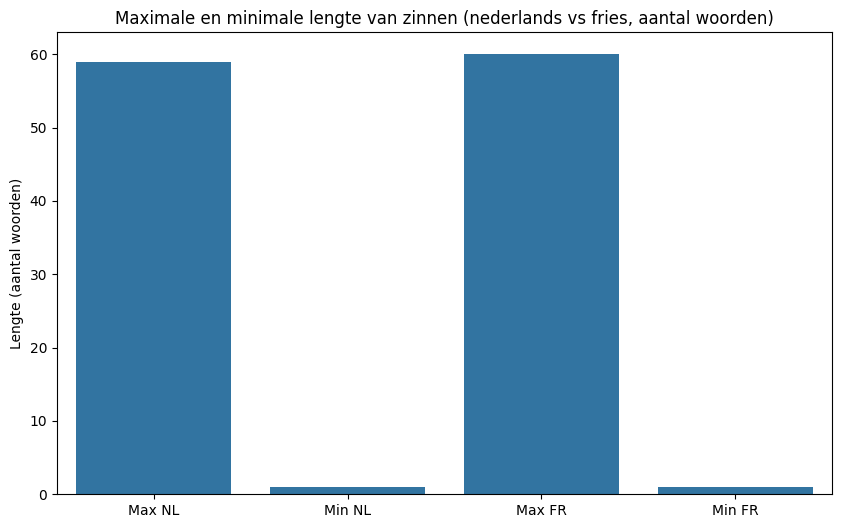

In [615]:
# Bereken de lengte van zinnen (aantal woorden) voor beide kolommen
df['nederlands_len'] = df['nederlands'].apply(lambda x: len(x.split()))
df['fries_len'] = df['fries'].apply(lambda x: len(x.split()))

# Plot en print de maximale en minimale lengte van de zinnen (op basis van aantal woorden)
max_nl_len = df['nederlands_len'].max()
min_nl_len = df['nederlands_len'].min()
max_fr_len = df['fries_len'].max()
min_fr_len = df['fries_len'].min()

print("Max aantal woorden NL: ", max_nl_len)
print("Min aantal woorden NL: ", min_nl_len)
print("Max aantal woorden FY: ", max_fr_len)
print("Min aantal woorden FY: ", min_fr_len)

# Bar plot voor maximale en minimale zinslengte (op basis van aantal woorden)
plt.figure(figsize=(10, 6))
sns.barplot(x=['Max NL', 'Min NL', 'Max FR', 'Min FR'], 
            y=[max_nl_len, min_nl_len, max_fr_len, min_fr_len])
plt.title('Maximale en minimale lengte van zinnen (nederlands vs fries, aantal woorden)')
plt.ylabel('Lengte (aantal woorden)')
plt.show()

In [616]:
# Print de rijen met de minimale en maximale lengte van de zinnen
min_nl_row = df[df['nederlands_len'] == min_nl_len]
min_fr_row = df[df['fries_len'] == min_fr_len]

In [617]:
min_nl_row.head(25)

,nederlands,fries,nederlands_len,fries_len
26,geboeid,mei de boeiens om,1,4
7542,boters,butersoarten,1,1
14756,los,los,1,1
16048,succes,sukses,1,1
17407,gevraagd:,frege:,1,1
17551,heus,echt,1,1
17552,heus,wier,1,1
17836,volmaaktheden,folsleinichheden,1,1
19455,links,lofts,1,1
19456,links,links,1,1


- Enkele woorden zijn in bepaalde contexten correct, maar hebben ook andere mogelijke vertalingen.
- Bij "achteruit" en "binnendoor" zijn de vertalingen niet altijd duidelijk, afhankelijk van de context van gebruik.

Bron: Samen doorgenomen met mijn pake en beppe.

In [618]:
min_fr_row.head(25)

,nederlands,fries,nederlands_len,fries_len
165,het doel treffen,sitte,3,1
338,met handslag loven en bieden,hanbakke,5,1
339,met handslag loven en bieden,hantsjebakke,5,1
340,met handslag loven en bieden,hantsjeplakke,5,1
429,een hele poos,skoften,3,1
1154,met uitzondering van,utsein,3,1
1347,goed drogend weer,drugerswaar,3,1
1521,in het bezit zijn van,hawwe,5,1
1763,in de eerste plaats,alderearst,4,1
1768,op de eerste plaats,alderearst,4,1


- Enkele woorden hebben geen directe vertaling of zijn contextueel niet correct.
- Dialectvormen kunnen soms acceptabel zijn, maar niet altijd algemeen gebruikt.
- Sommige vertalingen zijn echt afhankelijk van de context waarin ze worden gebruikt.

Bron: Mijn pake en beppe

Ik wou ook nog kijken of er bepaalde zinnen zijn die vaker voorkomen, daarom heb ik aan **ChatGPT** gevraagd of hij een summary kon maken die voor de nederlandse en friese zinnen de unieke rijen toont, de meest voorkomende waarde (top) en de frequentie van die top waarde.

In [619]:
# Statistieken berekenen voor de Nederlandse zinnen
nederlands_stats = {
    'count': df['nederlands'].count(),  # Aantal niet-nul waarden
    'unique': df['nederlands'].nunique(),  # Aantal unieke waarden
    'top': df['nederlands'].mode()[0],  # Meest voorkomende waarde
    'freq': df['nederlands'].value_counts().max()  # Frequentie van de meest voorkomende waarde
}

# Statistieken berekenen voor de Friese zinnen
fries_stats = {
    'count': df['fries'].count(),
    'unique': df['fries'].nunique(),
    'top': df['fries'].mode()[0],
    'freq': df['fries'].value_counts().max()
}

In [620]:
nederlands_stats

{'count': 173883,
 'unique': 97491,
 'top': 'eigenlijk moeten we bruinbrood eten na twee dagen begint het gejammer over verstopping en opgezette buiken',
 'freq': 192}

Deze zin komt dus 192 keer voor wat welk erg bijzonder is.

In [621]:
specific_value = "eigenlijk moeten we bruinbrood eten na twee dagen begint het gejammer over verstopping en opgezette buiken"

# Filter de DataFrame
filtered_rows = df[df['nederlands'] == specific_value]

# Toon de gefilterde rijen
pd.options.display.max_colwidth = 100
filtered_rows


,nederlands,fries,nederlands_len,fries_len
83802,eigenlijk moeten we bruinbrood eten na twee dagen begint het gejammer over verstopping en opgeze...,eins moatte wy brune ite nei twa dagen begjint it jammerjen oer ferstopping en opsette buken,16,16
83803,eigenlijk moeten we bruinbrood eten na twee dagen begint het gejammer over verstopping en opgeze...,eins moatte wy brune ite nei twa dagen begjint it jammerjen oer ferstopping en opsette liven,16,16
83804,eigenlijk moeten we bruinbrood eten na twee dagen begint het gejammer over verstopping en opgeze...,eins moatte wy brune ite nei twa dagen begjint it jammerjen oer ferstoppe en opsette buken,16,16
83805,eigenlijk moeten we bruinbrood eten na twee dagen begint het gejammer over verstopping en opgeze...,eins moatte wy brune ite nei twa dagen begjint it jammerjen oer ferstoppe en opsette liven,16,16
83806,eigenlijk moeten we bruinbrood eten na twee dagen begint het gejammer over verstopping en opgeze...,eins moatte wy brune ite nei twa dagen begjint it jammerjen oer sitten en opsette buken,16,16
...,...,...,...,...
83989,eigenlijk moeten we bruinbrood eten na twee dagen begint het gejammer over verstopping en opgeze...,eins moatte wy oan e kuchbole nei twa dagen begjint it seuren oer ferstopping en opsette liven,16,17
83990,eigenlijk moeten we bruinbrood eten na twee dagen begint het gejammer over verstopping en opgeze...,eins moatte wy oan e kuchbole nei twa dagen begjint it seuren oer ferstoppe en opsette buken,16,17
83991,eigenlijk moeten we bruinbrood eten na twee dagen begint het gejammer over verstopping en opgeze...,eins moatte wy oan e kuchbole nei twa dagen begjint it seuren oer ferstoppe en opsette liven,16,17
83992,eigenlijk moeten we bruinbrood eten na twee dagen begint het gejammer over verstopping en opgeze...,eins moatte wy oan e kuchbole nei twa dagen begjint it seuren oer sitten en opsette buken,16,17


Het lijkt erop dat er soms andere woorden worden gebruikt die hetzelfde kunnen betekeken dus ik ga er niks mee doen.

In [622]:
fries_stats

{'count': 173883,
 'unique': 139776,
 'top': 'trije by fiif trije by fiif meter',
 'freq': 32}

In [623]:
specific_value = "trije by fiif trije by fiif meter"

# Filter de DataFrame
filtered_rows = df[df['fries'] == specific_value]

# Toon de gefilterde rijen
pd.options.display.max_colwidth = 100
filtered_rows


,nederlands,fries,nederlands_len,fries_len
95843,twee bij vier twee bij vier centimeter,trije by fiif trije by fiif meter,7,7
95875,twee bij vier twee bij vier meter,trije by fiif trije by fiif meter,7,7
95907,twee bij vier twee bij vijf centimeter,trije by fiif trije by fiif meter,7,7
95939,twee bij vier twee bij vijf meter,trije by fiif trije by fiif meter,7,7
95971,twee bij vier drie bij vier centimeter,trije by fiif trije by fiif meter,7,7
96003,twee bij vier drie bij vier meter,trije by fiif trije by fiif meter,7,7
96035,twee bij vier drie bij vijf centimeter,trije by fiif trije by fiif meter,7,7
96067,twee bij vier drie bij vijf meter,trije by fiif trije by fiif meter,7,7
96099,twee bij vijf twee bij vier centimeter,trije by fiif trije by fiif meter,7,7
96131,twee bij vijf twee bij vier meter,trije by fiif trije by fiif meter,7,7


Hier is iets misgegaan. De zin in het Nederlands is "drie bij vijf drie bij vier meter", bij veel rijen zijn de getallen verkeerd gegaan. En soms staat er opeens centimer (sintimeter) in plaats van meter.

Daarom verwijder ik wel al deze rijen.

In [624]:
df = df[df['fries'] != 'trije by fiif trije by fiif meter']

# Data Preparation

[[ go back to the top ]](#Table-of-contents)

<div class="alert alert-block alert-danger"><b>Note:</b> Veel code komt van de werkcolleges of van ChatGPT, dit staat aangegeven. Maar met ChatGPT heb ik comments geschreven bij elke code om alles zelf beter te begrijpen</div>

---

Voor deze stap heb ik de instructies uit de les gevolgd, maar met enkele aanpassingen om het model te optimaliseren. Een van die aanpassingen is het toevoegen van de speciale tokens [start] en [end] aan de Nederlandse zinnen. Dit is niet verplicht, maar het helpt de decoder om duidelijk het begin en einde van elke zin te herkennen. Dit kan de prestaties van het vertaalmodel verbeteren, omdat de decoder precies weet waar hij moet beginnen en stoppen met het genereren van vertalingen. 

In [625]:
text_file = "texts.txt"
text_pairs_test = []
current_translation = None

# Open het tekstbestand
with open(text_file, encoding='utf8') as f:
    # Lees alle regels en splits deze op nieuwe regels, behalve de laatste lege regel
    lines = f.read().split("\n")[:-1]

# Loop door elke regel in het bestand
for line in lines:
    # Controleer of de regel niet begint met "tr:" (dit betekent dat het een Nederlandse zin is)
    if not line.startswith("tr:"):
        # Voeg "[start]" en "[end]" tokens toe aan de Nederlandse zin en sla deze op
        current_translation = "[start] " + line + " [end]"  
    # Als de regel wel begint met "tr:", betekent dit dat het een Friese vertaling is
    elif current_translation:
        # Verwijder het "tr: " label uit de Friese zin
        fries = line.replace("tr: ", "")
        # Voeg het koppel (Friese zin, Nederlandse zin) toe aan de text_pairs_test lijst
        text_pairs_test.append((fries, current_translation))

text_pairs_test[:5]

[("Dat leste hat it tastel noch twa kear foar by de makker west: it foldocht neffens de [reparaasjetsjinst, makkerstsjinst, makkerij] perfekt oan 'e technyske spesifikaasjes.",
  '[start] dataset/texts.txtVoor dit laatste is het toestel nog twee keer in herstelling geweest: het voldoet volgens de hersteldienst perfect aan de technische specificaties. [end]'),
 ('Us [reparaasjetsjinst, makkerstsjinst, makkerij] stiet klear om dizze maleur sa gau mooglik by te helpen.',
  '[start] Onze hersteldienst staat klaar om dit defect zo snel mogelijk op te lossen. [end]'),
 ('Us makkers steane klear om dizze maleur sa gau mooglik by te helpen.',
  '[start] Onze hersteldienst staat klaar om dit defect zo snel mogelijk op te lossen. [end]'),
 ('Lytse [reparaasjetsjinsten, makkerstsjinsten, makkerijen] by fytsen, fuotark en learguod, klean en hushaldlik linnen.',
  '[start] Kleine hersteldiensten bij fietsen, schoeisel en lederwaren, kleding en huishoudlinnen. [end]'),
 ('De earetsjinst, de hielings

Deze code doet het volgende:

- **Inladen van het tekstbestand:** De code leest het bestand `texts.txt` regel voor regel in, waarbij elke regel ofwel een Nederlandse zin of een Friese vertaling bevat.
- **Structuur van de zinnen:** Zinnen die geen "tr:" aan het begin hebben, worden beschouwd als de Nederlandse zinnen. Deze zinnen worden voorzien van de tokens [start] aan het begin en [end] aan het einde.
- **Vertaalde zinnen koppelen:** Als een regel begint met "tr:", wordt dit beschouwd als de Friese vertaling van de laatst gelezen Nederlandse zin. De code koppelt deze Friese zin aan de bijbehorende Nederlandse zin (met de [start] en [end] tokens), en voegt dit koppel toe aan de lijst `text_pairs_test`.
- **Gebruik van testdata:** De resulterende koppels (Fries, Nederlands) worden bewaard in `text_pairs_test`, die uiteindelijk gebruikt wordt als testdata voor het model.

---

Naast het verwerken van een tekstbestand voor de testdata, gebruik ik een **CSV-bestand** genaamd `dataset.csv` voor de trainingsdata. In deze dataset bevat elke rij een Nederlands-Friese vertaling. Het doel is om de Friese zinnen als invoer te gebruiken en te vertalen naar het Nederlands, waarbij we opnieuw de speciale tokens [start] en [end] aan de Friese zinnen toevoegen. Dit helpt, net als bij de eerdere stap, om het begin- en eindpunt van de zin duidelijk te markeren voor de decoder.

De onderstaande code doorloopt elke rij van de dataset en haalt zowel de Nederlandse als Friese zin op. Vervolgens wordt een tuple gevormd waarbij de Friese zin is aangevuld met de [start] en [end] tokens. Deze koppels worden opgeslagen in een lijst genaamd text_pairs.

In [626]:
# Lege lijst om paren van Nederlands en Fries op te slaan
text_pairs_train = []

# Loop door elke rij in de dataframe 'df', waarbij index en rij worden opgehaald
for index, row in df.iterrows():
    # Voeg een tuple toe aan text_pairs:
    # - De Nederlandse zin (row['nederlands'])
    # - De Friese zin (row['fries']) met '[start]' aan het begin en '[end]' aan het einde
    text_pairs_train.append((row['nederlands'], '[start]' + row['fries'] + '[end]'))

Deze code bereidt een set van karakters voor, die vervolgens waarschijnlijk wordt gebruikt om deze karakters uit tekst te verwijderen. De [ en ] tekens worden echter behouden omdat ze waarschijnlijk worden gebruikt voor speciale aanduidingen (zoals tokenbegrenzers).

In [627]:
# Importeer de string module om toegang te krijgen tot interpunctietekens
strip_chars = string.punctuation + "¿"

# Verwijder de '[' uit de strip_chars string, zodat het niet wordt gestript
strip_chars = strip_chars.replace("[", "")

# Verwijder de ']' uit de strip_chars string, zodat het niet wordt gestript
strip_chars = strip_chars.replace("]", "")

Het doel van `custom_standardization()` is om de invoerstrings voor te bereiden op een manier die de effectiviteit van tekstanalyses en machine learning-modellen vergroot door inconsistenties en ruis in de gegevens te verminderen.

In [628]:
def custom_standardization(input_string):
    # Zet de input string om naar kleine letters (lowercase)
    lowercase = tf.strings.lower(input_string)
    
    # Gebruik regex om alle ongewenste karakters te verwijderen (strip_chars), 
    # en vervang deze door een lege string (dus verwijder ze).
    return tf.strings.regex_replace(
        lowercase, f"[{re.escape(strip_chars)}]", "")

Nu definiëren we de `vocab_size` en `sequence_length` deze doen het volgende:

- **vocab_size** helpt bij het definiëren van de diversiteit van de woorden die in het model kunnen worden gebruikt.
- **sequence_length** bepaalt hoe lang elke invoersequentie maximaal mag zijn. Samen helpen ze de inputdata te structureren voor efficiënte training van het model.

In [629]:
vocab_size = 60000
sequence_length = 20

In [630]:
# TextVectorization laag voor de broninvoer (Nederlands)
source_vectorization = layers.TextVectorization(
    max_tokens=vocab_size,  # Maximaal aantal unieke tokens in de woordenschat
    output_mode="int",  # De uitvoer is een reeks gehele getallen (indexen)
    output_sequence_length=sequence_length,  # Maximalen sequentielengte voor de invoer
)

In [631]:
# TextVectorization laag voor de doelinvoer (Fries)
target_vectorization = layers.TextVectorization(
    max_tokens=vocab_size,  # Maximaal aantal unieke tokens in de woordenschat
    output_mode="int",  # De uitvoer is een reeks gehele getallen (indexen)
    output_sequence_length=sequence_length + 1,  # Maximalen sequentielengte met 1 extra voor de doelzin
    standardize=custom_standardization,  # Gebruik een aangepaste standaardisatiefunctie voor tekstverwerking
)

In [632]:
# Haal de Nederlandse teksten uit de trainingsdataset
train_dutch_texts = [pair[0] for pair in text_pairs_train]

# Haal de Friese teksten uit de trainingsdataset
train_fries_texts = [pair[1] for pair in text_pairs_train]

In [633]:
# Pas de TextVectorization laag aan op basis van de Nederlandse teksten
source_vectorization.adapt(train_dutch_texts)

# Pas de TextVectorization laag aan op basis van de Friese teksten
target_vectorization.adapt(train_fries_texts)

Dan definieër ik de `batch_size`, dit verwijst naar het aantal trainingsexemplaren dat tegelijkertijd door het model wordt verwerkt tijdens één interatie van de training.

In [634]:
batch_size = 8

De code hieronder bevat twee functies (`format_dataset` en `make_dataset`) die zijn ontworpen om een dataset te formatteren en te creëren voor een machine learning-model dat zinnen van het Nederlands naar het Fries vertaalt.

1. **format_dataset**: Deze functie neemt Nederlandse en Friese tekstinvoer, past vectorisatie toe om ze om te zetten in een numerieke representatie, en retourneert deze in een specifiek formaat. De functie verwijdert ook de eerste token van de Friese tekst (doelvariabele) en de laatste token (invoervariabele) om de juiste trainingseffecten te bereiken.

2. **make_dataset**: Deze functie maakt een TensorFlow dataset uit een lijst van tekstparen. Het splitst de tekstparen in afzonderlijke lijsten, maakt een TensorFlow dataset van deze lijsten, groepeert de gegevens in batches, past de format_dataset functie toe op elke batch en schudt de dataset om te zorgen voor betere training en generalisatie van het model.

Samen zorgen deze functies ervoor dat de dataset goed is voorbereid voor training.

In [635]:
def format_dataset(nl, frie):
    # Voert vectorisatie uit op de Nederlandse (nl) en Friese (frie) zinnen
    nl = source_vectorization(nl)  # Vectoriseert Nederlandse teksten naar integer representatie
    frie = target_vectorization(frie)  # Vectoriseert Friese teksten naar integer representatie
    
    return ({
        "nl": nl,  # Retourneert de genormaliseerde Nederlandse teksten
        "fries": frie[:, :-1],  # Retourneert de Friese teksten zonder de laatste token
    }, frie[:, 1:])  # Retourneert de Friese teksten zonder de eerste token als doelvariabele

In [636]:
def make_dataset(pairs):
    # Splitst de paar (nl, frie) in aparte lijsten voor Nederlandse en Friese teksten
    nl_texts, fry_texts = zip(*pairs)
    nl_texts = list(nl_texts)  # Zet de Nederlandse teksten om in een lijst
    fry_texts = list(fry_texts)  # Zet de Friese teksten om in een lijst
    
    # Maakt een TensorFlow dataset van de Nederlandse en Friese teksten
    dataset = tf.data.Dataset.from_tensor_slices((nl_texts, fry_texts))
    
    # Groepeert de dataset in batches van de opgegeven batch_size
    dataset = dataset.batch(batch_size)
    
    # Past de format_dataset functie toe op elke batch, met parallelle verwerking
    dataset = dataset.map(format_dataset, num_parallel_calls=4)
    
    # Schudt de dataset om een betere generalisatie te bevorderen en optimaliseert de training
    return dataset.shuffle(2048).prefetch(16).cache()

In [637]:
# Maak de train- en test dataframes
train_ds = make_dataset(text_pairs_train)
test_ds = make_dataset(text_pairs_test)

In [638]:
# Check of alles dezelfde shape heeft
for inputs, targets in train_ds.take(1):
    print(f"inputs['fries'].shape: {inputs['fries'].shape}")
    print(f"inputs['nl'].shape: {inputs['nl'].shape}")
    print(f"targets.shape: {targets.shape}")

inputs['fries'].shape: (8, 20)
inputs['nl'].shape: (8, 20)
targets.shape: (8, 20)


2024-10-13 11:17:00.598821: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Nadat alle voorbereiding klaar wordt de `transformer encoder` gedefinieërd. Deze bestaat uit **Normalisatielagen** en **DenseLayers** zodat de input goed verwerkt kan worden.

Deze code is uit het notebook `Thema 3 werkcollege 3 - transformers docent.ipynb` gehaald.

In [639]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim  # Dimensie van de embedded representatie
        self.dense_dim = dense_dim  # Dimensie van de dense laag
        self.num_heads = num_heads  # Aantal hoofden voor multi-head attention

        # Initialiseer de multi-head attention laag
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        
        # Sequential model voor de dense projectielaag
        self.dense_proj = keras.Sequential(
            [
                layers.Dense(dense_dim, activation="relu"),  # Dichte laag met ReLU activatie
                layers.Dense(embed_dim),  # Dichte laag om terug te keren naar de embedded dimensie
            ]
        )
        
        # Laagnormalisatie om stabiliteit te verbeteren
        self.layernorm_1 = layers.LayerNormalization(epsilon=1e-7)  # MklLayerNormError FIX 
        self.layernorm_2 = layers.LayerNormalization(epsilon=1e-7)  # MklLayerNormError FIX 

    def call(self, inputs, mask=None):
        # Pas de aandachtmasker aan indien aanwezig
        if mask is not None:
            mask = mask[:, tf.newaxis, :]

        # Bereken de aandachtoutput
        attention_output = self.attention(inputs, inputs, attention_mask=mask)

        # Voeg de oorspronkelijke invoer toe aan de aandachtoutput en normaliseer
        proj_input = self.layernorm_1(inputs + attention_output)

        # Projecteer de input door de dense laag
        proj_output = self.dense_proj(proj_input)

        # Voeg de projectieoutput toe aan de genormaliseerde input en normaliseer opnieuw
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        # Verkrijg de configuratie van de laag voor serialisatie
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

Vervolgens wordt de `Transformer Decoder`gedefiniëerd. Deze doet twee dingen, hij kijkt eerst naar de vorige woorden in de uitvoer en koppelt deze daarna naar de uitkomst van de encoder. De decoder zorgt er als het ware voor dat het model niet kan valsspelen door te kijken naar de komende woorden in de zin.

Ook deze code komt uit het notebook `Thema 3 werkcollege 3 - transformers docent.ipynb`.

In [640]:
class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim  # Dimensie van de embedded representatie
        self.dense_dim = dense_dim  # Dimensie van de dense laag
        self.num_heads = num_heads  # Aantal hoofden voor multi-head attention

        # Initialiseer de eerste multi-head attention laag (self-attention)
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        
        # Initialiseer de tweede multi-head attention laag (encoder-decoder attention)
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        
        # Sequential model voor de dense projectielaag
        self.dense_proj = keras.Sequential(
            [
                layers.Dense(dense_dim, activation="relu"),  # Dichte laag met ReLU activatie
                layers.Dense(embed_dim),  # Dichte laag om terug te keren naar de embedded dimensie
            ]
        )
        
        # Laagnormalisatie om stabiliteit te verbeteren
        self.layernorm_1 = layers.LayerNormalization(epsilon=1e-7)
        self.layernorm_2 = layers.LayerNormalization(epsilon=1e-7)
        self.layernorm_3 = layers.LayerNormalization(epsilon=1e-7)
        self.supports_masking = True  # Ondersteuning voor masking in de aandachtmechanismen

    def get_config(self):
        # Verkrijg de configuratie van de laag voor serialisatie
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

    def get_causal_attention_mask(self, inputs):
        # Voorkom dat het model leert om het volgende token van de invoer naar de uitvoer te kopiëren door dit te verbergen
        # [[1,0,0],
        #  [1,1,0],
        #  [1,1,1]]
        input_shape = tf.shape(inputs)  # Verkrijg de vorm van de invoer
        batch_size, sequence_length = input_shape[0], input_shape[1]
        
        i = tf.range(sequence_length)[:, tf.newaxis]  # Maak een kolomvector van de sequentielengte
        j = tf.range(sequence_length)  # Maak een rijvector van de sequentielengte
        mask = tf.cast(i >= j, dtype="int32")  # Maak de causale aandachtmasker
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))  # Herstructureren naar juiste vorm
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1),
             tf.constant([1, 1], dtype=tf.int32)], axis=0)
        # Dupliceer het masker langs de batch-as om een matrix te krijgen van de vorm (batch_size, sequence_length, sequence_length)
        return tf.tile(mask, mult)

    def call(self, inputs, encoder_outputs, mask=None):
        # Verkrijg het causale masker
        causal_mask = self.get_causal_attention_mask(inputs)
        
        if mask is not None:  # Bereid het invoermasker voor dat de paddinglocaties in de doelsequentie beschrijft
            padding_mask = tf.cast(
                mask[:, tf.newaxis, :], dtype="int32")  # Extra dim aangezien de transformer dit verwacht
            padding_mask = tf.minimum(padding_mask, causal_mask)  # Combineer beide maskers (invoerpadding en volgende woordpadding)

        # Voer self-attention uit over de doelsequentie
        attention_output_1 = self.attention_1(
            query=inputs,
            value=inputs,
            key=inputs,
            attention_mask=causal_mask)  # Geef het causale masker door aan de eerste aandachtlaag
        attention_output_1 = self.layernorm_1(inputs + attention_output_1)  # Laagnormalisatie na de eerste aandacht

        # Voer encoder-decoder attention uit
        attention_output_2 = self.attention_2(
            query=attention_output_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask)  # Geef het gecombineerde masker door aan de tweede aandachtlaag
        attention_output_2 = self.layernorm_2(attention_output_1 + attention_output_2)  # Laagnormalisatie na de tweede aandacht

        # Projecteer de output door de dense laag en normaliseer opnieuw
        proj_output = self.dense_proj(attention_output_2)
        return self.layernorm_3(attention_output_2 + proj_output)  # Eindresultaat met normalisatie

Tot slot de `positional embedding`, deze zorgt voor een combinatie van de token en positie. Zo weet het model welk woord het is, maar nog belangrijker: ook op welke plek in de zin het woordt moet staan. Wat voor bepaalde contexten erg belangrijk is voor de betekenis van een bepaald woord.

Ook deze code komt uit het notebook `Thema 3 werkcollege 3 - transformers docent.ipynb`.

In [641]:
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)

        # Initialiseer de embeddings voor tokens en posities
        self.token_embeddings = layers.Embedding(           # Gewone embedding voor tokens
            input_dim=input_dim, output_dim=output_dim)
        self.position_embeddings = layers.Embedding(        # Positie embedding voor tokens
            input_dim=sequence_length, output_dim=output_dim)
        
        # Opslaan van relevante instellingen voor latere lagen
        # Het definiëren van de instellingen als onderdeel van het object (self.) maakt het
        # gemakkelijker om ze consistent toe te passen in de call() methode
        self.sequence_length = sequence_length  # Lengte van de sequentie
        self.input_dim = input_dim              # Aantal unieke tokens
        self.output_dim = output_dim            # Dimensie van de embeddings

    def call(self, inputs):
        length = tf.shape(inputs)[-1]                               # Lengte van de invoerzinnen
        positions = tf.range(start=0, limit=length, delta=1)        # 0-geindexeerde posities van tokens in de sequenties
        
        # Genereer de feitelijke positie embeddings
        embedded_tokens = self.token_embeddings(inputs)             # Gewone embeddings van de tokens
        embedded_positions = self.position_embeddings(positions)    # Positie embeddings
        
        # We maken hier een tweede embeddingspace voor de positie die we daarna bij de originele embeddings optellen
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        # Genereer een masker gebaseerd op waar de input niet gelijk is aan 0
        return tf.math.not_equal(inputs, 0)  # Dit zorgt ervoor dat we de input niet hoeven te paddelen

    def get_config(self):
        # Verkrijg de configuratie van de laag voor serialisatie
        config = super().get_config()
        config.update({
            "output_dim": self.output_dim,
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,
        })
        return config


# Modeling

[[ go back to the top ]](#Table-of-contents)

<div class="alert alert-block alert-danger"><b>Note:</b> Veel code komt van de werkcolleges of van ChatGPT, dit staat aangegeven. Maar met ChatGPT heb ik comments geschreven bij elke code om alles zelf beter te begrijpen</div>

---

Voor het eerste model heb ik hetzelfde basic netwerk getest die uit de werkcollege. 

Mijn laptop liep soms tegen memory en andere errors aan (`ResourceExhaustedError`), daarom heb ik helaas de keuze moeten maken om mijn vocab_size significant te verminderen. Anders kon ik simpelweg het model niet draaien.

In [642]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" 

In [643]:
import tensorflow as tf
from keras import backend as K

# Reset de TensorFlow grafiek en Keras backend
K.clear_session()  # Verwijder de huidige Keras-modellen en -grafieken
tf.keras.backend.clear_session()  # Reset TensorFlow grafiek

# Optioneel: Dwing TensorFlow om GPU-geheugen vrij te geven
tf.compat.v1.reset_default_graph()  # Reset de standaard grafiek

In [644]:
# Maak een seq2seq-model
embed_dim = 128  # Dimensie van de woordembeddings (hoeveelheid informatie per woord)
dense_dim = 1024  # Dimensie van de interne dense lagen (aantal neuronen in de lagen)
num_heads = 4  # Aantal aandacht "hoofden" (voor parallelle verwerking van verschillende informatie-aspecten)

# Definieer de invoer voor de encoder met een dynamische sequentielengte
encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="fries")

# Voeg positionele embeddings toe aan de invoer van de encoder
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(encoder_inputs)

# Encodeer de source zin (Friese tekst) met behulp van de TransformerEncoder
encoder_outputs = TransformerEncoder(embed_dim, dense_dim, num_heads)(x) 

# Definieer de invoer voor de decoder met een dynamische sequentielengte
decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="nl")

# Voeg positionele embeddings toe aan de invoer van de decoder
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(decoder_inputs)

# Encodeer de target zin (Nederlandse tekst) met behulp van de TransformerDecoder en de uitvoer van de encoder
x = TransformerDecoder(embed_dim, dense_dim, num_heads)(x, encoder_outputs)

# Voeg dropout toe om overfitting te verminderen tijdens het trainen
x = layers.Dropout(0.5)(x)

# Voorspel een woord voor elke outputpositie met behulp van een Dense laag met softmax-activatie
decoder_outputs = layers.Dense(vocab_size, activation="softmax")(x)

# Maak het seq2seq-model aan dat de encoder- en decoderinvoer verbindt met de decoderuitvoer
transformer = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [645]:
transformer.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 fries (InputLayer)          [(None, None)]               0         []                            
                                                                                                  
 nl (InputLayer)             [(None, None)]               0         []                            
                                                                                                  
 positional_embedding (Posi  (None, None, 128)            7682560   ['fries[0][0]']               
 tionalEmbedding)                                                                                 
                                                                                                  
 positional_embedding_1 (Po  (None, None, 128)            7682560   ['nl[0][0]']              

In [646]:
transformer.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [649]:
history = transformer.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
21732/21732 [==============================] - 3128s 144ms/step - loss: 5.2271 - accuracy: 0.4315 - val_loss: 3.3310 - val_accuracy: 0.6777
Epoch 2/5
21732/21732 [==============================] - 2971s 137ms/step - loss: 4.0972 - accuracy: 0.5990 - val_loss: 3.3284 - val_accuracy: 0.6781
Epoch 3/5
21732/21732 [==============================] - 3469s 160ms/step - loss: 4.0157 - accuracy: 0.6077 - val_loss: 3.2580 - val_accuracy: 0.6818
Epoch 4/5
21732/21732 [==============================] - 3298s 152ms/step - loss: 3.9704 - accuracy: 0.6125 - val_loss: 3.3240 - val_accuracy: 0.6834
Epoch 5/5
21732/21732 [==============================] - 3474s 160ms/step - loss: 3.9393 - accuracy: 0.6159 - val_loss: 3.3409 - val_accuracy: 0.6854


# Evaluation 

[[ go back to the top ]](#Table-of-contents)

---

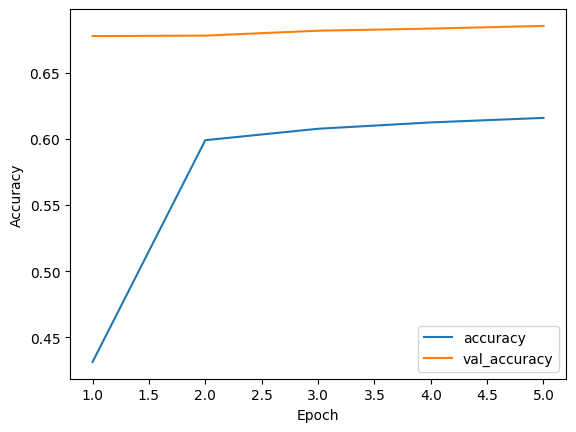

In [650]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(1, len(acc)+1)                        
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Gedurende de training is de accuracy omhoog gegaan tussen de 1e en 2e epoch, maar daar hield het ook wel bij op. 

De training loss daalt ook consistent, het model leert dus beter op de trainingsdata. Echter, de validatieloss blijft relatief stabiel na de eerste epochs, en vertoont geen significante verbetering na epoch 2, wat erop kan wijzen dat het model mogelijk moeite heeft om beter te generaliseren op de validatieset.

De val_accuracy blijft wel stijgen, al is het wel heel langzaam. Als het model geoptimaliseerd wordt om de overfitting tegen te gaan zou deze stijging wellicht groter kunnenn zijn.

In de conclusie leg ik uit waarom ik geen geoptimaliseerd/ verbeterd model heb gemaakt.

---

Om nu het model daadwerkelijk te gebruiken om Friese zinnen naar het Nederlands te vertalen heb ik aan ChatGPT gevraagd om gebruik te maken van het model

In [651]:
# Haal de vocabulaire op van de target vectorization
nl_vocab = target_vectorization.get_vocabulary()

# Maak een woordenboek voor de index-lookup van Nederlandse woorden
nl_index_lookup = dict(zip(range(len(nl_vocab)), nl_vocab))

# Maximaal aantal te decoderen tokens in de zin
max_decoded_sentence_length = 20

def decode_sequence(input_sentence):
    # Tokeniseer de inputzin (Friese zin) met de source vectorization
    tokenized_input_sentence = source_vectorization([input_sentence])
    
    # Begin met het decoderen van de zin met het [start]-token
    decoded_sentence = "[start]"
    
    # Loop door het maximale aantal decoderingen
    for i in range(max_decoded_sentence_length):
        # Tokeniseer de tot nu toe gedecodeerde zin (exclusief het laatste token)
        tokenized_target_sentence = target_vectorization([decoded_sentence])[:, :-1]
        
        # Voorspel de volgende tokens met het transformer-model
        predictions = transformer([tokenized_input_sentence, tokenized_target_sentence])
        
        # Selecteer de index van het meest waarschijnlijke volgende token
        sampled_token_index = np.argmax(predictions[0, i, :])
        
        # Haal het volgende token op uit de woordenlijst
        sampled_token = nl_index_lookup[sampled_token_index]
        
        # Voeg het volgende token toe aan de gedecodeerde zin
        decoded_sentence += " " + sampled_token
        
        # Stop met decoderen als het [end]-token is bereikt
        if sampled_token == "[end]":
            break
    
    return decoded_sentence

Deze code heb ik van `Iris Oerlemans` gekregen. Deze code selecteert willekeurge zinnen uit de testdataset (`texts.txt`), decodeert deze naar de doeltaal, en vergelijk de voorspelling met de werkelijke zin.

Voor elke gekozen zin worden zowel de voorspelde als de werkelijke vertaling weergegeven, waarbij de voorspelling in oranje en de werkelijke zin in blauw wordt weergegeven voor een visuele vergelijking.

Deze code is geschreven met **ChatGPT**.

In [652]:
import random

predicted_sentences = []
actual_sentences = []

# Haal de Engelse teksten op uit de testdataset
test_texts = [pair[0] for pair in text_pairs_test]

# Genereer 20 voorspellingen
for _ in range(20):
    # Kies willekeurig een Engelse zin uit de testdataset
    input_sentence = random.choice(test_texts)

    # Decodeer de zin naar de doeltaal (bijv. Fries)
    predicted_sentence = decode_sequence(input_sentence)

    # Voeg de voorspelde zin toe aan de lijst van voorspellingen
    predicted_sentences.append(predicted_sentence)

    # Vind de bijbehorende werkelijke zin voor de gekozen Engelse zin
    actual_sentence = [pair[1] for pair in text_pairs_test if pair[0] == input_sentence][0]
    # Voeg de werkelijke zin toe aan de lijst van werkelijke zinnen
    actual_sentences.append(actual_sentence)

    # Print een scheidingsteken voor duidelijkheid
    print("-")
    # Print de gekozen Engelse zin
    print(input_sentence)
    print(f"\033[38;5;214m{predicted_sentence}\033[0m")  # Voorspelde zin in oranje
    print(f"\033[38;5;32m{actual_sentence}\033[0m")  # Echte zin in blauw


-
immen in triuwke jaan
[start] yn [UNK] [UNK]       [UNK]         [UNK] 
[start] iemand een duwtje geven [end]
-
in bek as in opsniene skoech
[start] ferbod ferbod yn [UNK] [UNK]     [UNK]         yn 
[start] een grote bek [end]
-
Famylje en freonen binne nacht en dei wolkom.
[start] en [UNK] [UNK] wurdt[end] en [UNK] [UNK]            wurdt[end] 
[start] Familie en vrienden mogen dag en nacht aanwezig zijn. [end]
-
It [famkesfuotbal, fammefuotbal, frouljusfuotbal] libbet yn 'e klup en is in wichtich underdiel fan us feriening.
[start] [UNK] [UNK] [UNK] [UNK] ferbod ferbod [UNK] en ferbod yn [UNK] [UNK] ferbod ferbod [UNK]  [UNK]  de 
[start] Het meidenvoetbal leeft binnen de club en is een belangrijk onderdeel van onze vereniging. [end]
-
De leste moannen wiene soksoarte saken in soad yn 'e publisiteit.
[start] [UNK] [UNK] [UNK] [UNK] [UNK] yn [UNK] ferbod ferbod [UNK]         [UNK] 
[start] De afgelopen maanden was dit soort zaken veel in de publiciteit. [end]
-
It materiaal is hiel 

## Resultaten Vertalingen

Ik heb de resultaten geanalyseerd samen met ChatGPT. Het model maakt duidelijk fouten bij het genereren van de Friese zinnen. De meest opvallende prolbemen en oplossingen zijn:

1. **Veel "UNK"-tokens:** In de voorspelde zinnen zie je vaak [UNK]. Dit betekent dat het model woorden tegenkomt die niet in de vocabulaire zijn waar het model mee getraind is. Hierdoor kan het model die woorden niet goed decoderen.

- **Oplossing:** Het vergroten van de `vocav_size` of het verfijnen van de trainingsdata zodat belangrijke woorden vaker voorkomen, kan dit probleem verminderen.

2. **Onlogische of incomplete zinnen:** Sommige zinnen die het model voorspelt, zijn grammaticaal incorrect of incompleet. Bijvoorbeeld:

- `"geastlik ferbod libben[end]"` in plaats van iets wat logisch is voor de zin "*Het materiaal is comfortabel en de kleuren zijn zacht".*
- `"ferbod ferbod"` dat twee keer achter elkaar verschijnt.

Dit kan erop wijzen dat het model moeite heeft om de juiste structuur van de zin te begrijpen en te vertalen. De voorspellingen lijken willekeurig of herhalend, wat vaak gebeurt als het model onvoldoende getraind is op langere of complexere zinnen.

- **Oplossing:** Het toevoegen van meer training op langere en complexere zinnen kan de kwaliteit van de zinnen verbeteren.

3. **Contextbegrip ontbreekt:** Het model heeft moeite om de context goed te interpreteren en de juiste woorden te kiezen. Bijvoorbeeld, in de zin `"Het materiaal is heel comfortabel"` komt het model met "geastlik ferbod", wat totaal niet relevant is voor de context van de zin.

- **Oplossing:** Het verbeteren van de modelarchitectuur door bijvoorbeeld meer aandacht te besteden aan contextuele informatie met behulp van verbeterde aandachtmechanismen (zoals het toevoegen van meerdere TransformerDecoder-lagen) kan helpen om zinnen met een betere betekenis te genereren.

---

## Conclusie

Uiteindelijk waren de resultaten van het model niet heel indrukwekkend. Deze resultaten geven aan dat het model momenteel niet goed presteert en dat er aanzienlijke ruimte is voor verbetering. Ik heb bewust de keuze gemaakt om bepaalde variabelen zoals de `vocab_size` en `sequence_length` lager te houden, hetzelfde als met de `embed_dim`, `dense_dim` en `num_heads`. De gekozen hyperparameters kunnen geoptimaliseerd worden. Een grotere dense_dim of meer attention heads kunnen bijvoorbeeld de prestaties verbeteren, maar vereisen meer rekenkracht. Ik heb dit niet gedaan simpelweg omdat ik anders tegen een (`ResourceExhaustingError`) aanliep. Ik kon het model gewoon niet draaien omdat mijn laptop niet krachtig genoeg was.

Dit is dan ook de reden waarom ik niet geëxperimenteerd heb met andere betere modellen, omdat ik het gewoon niet draaiende kreeg. Dit probleem is in de toekomst echter wel opgelost omdat ik dan toegang heb tot een apparaat die wel de vereiste rekenkracht heeft.

---

Echter heb ik wel nagedacht over mogelijke **vervolgstappen** en **experimenten** die het model zouden kunnen verbeteren:

1. **Verhoog de Dimensies van Embeddings en Dense Layers**
Momenteel gebruikt het model een `embedding-dimensie` van 128 en een interne `dense-dimensie` van 1024. Voor een verbeterd model zou ik sterk aanraden om deze te verhogen naar 256 en 2048, of zelfs 512 en 4096. Het verhogen van deze dimensies kan leiden tot een betere representatie van de invoerdata en meer capaciteit voor het model om complexe patronen te leren.

2. **Verhoog het Aantal num_heads**
Het model maakt gebruik van `4 num_heads`. Door deze te verhogen naar 8 of zelfs 16 kan het model verschillende aspecten van de zinnen tegelijkertijd verwerken wat kan resulteren in een betere performance.

3. **Gebruik van Dropout**
Het model heeft momenteel een `dropout` van **0.5** na de decoder, wat goed is voor het verminderen van overfitting. Het kan ook nuttig zijn om dropout toe te passen in andere delen van het netwerk, zoals na de encoderoutput of na de embeddings.

4. **Optimalisatie van de Trainingsparameters**
In de toekomst wil ik meer experimenteren met verschillende optimizer-configuraties. In plaats van alleen `rmsprop`, kan het ook helpen om `Adam` met een aangepaste leersnelheid te proberen.


# Deployment

[[ go back to the top ]](#Table-of-contents)

---

Bij het implementeren van een machine learning-model zoals dit seq2seq-model, zijn er verschillende waar je rekening mee moet houden voor gebruik in de praktijk.

### Deployment-opties
Hoewel er verschillende manieren zijn om zo'n model te deployen heb ik zelf alleen ervaring met Docker en gaat mijn voorkeur dus uit naar een Docker Container:
- Maak een Docker-image van je applicatie met het model en gebruik deze in een containeromgeving.

Maar weet wel dat er meerdere opties beschikbaar zijn naast Docker, een model zoals dit zou ook op een Cloud-omgeving kunnen draaien. Of je kan het aanroepen via een API.

### Gebruik in de praktijk
Voor de specifieke use case van dit project zou het model gebruikt kunnen worden om friese teksten te vertalen naar het Nederlands of andersom, in formele contexten zoals academie.